# Time Series Creator
    - Author Concetta D'Amato
    - Licence Creative Commons 4.0

In [1]:
import os
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from timeseries_writer import *
from netCDF4 import Dataset
import matplotlib.ticker as mtick
import gf
import time
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
oms_project_path = os.path.dirname(os.getcwd())

## Create Date Time Index

To create the timeseries it is possible to use the method `pandas.date_range()`

The timeseries can be specified by defining the start date `start` and the end date `end`, or the start date `start` and the number of periods `periods`.

The frequency is defined by `freq`:
- `D` daily;
- `H` hourly;
- `T` minutes;

In [2]:
date_rng = pd.date_range(start='15/12/2013 00:00', end='16/12/2015 00:00' , freq='1H')
date_rng

DatetimeIndex(['2013-12-15 00:00:00', '2013-12-15 01:00:00',
               '2013-12-15 02:00:00', '2013-12-15 03:00:00',
               '2013-12-15 04:00:00', '2013-12-15 05:00:00',
               '2013-12-15 06:00:00', '2013-12-15 07:00:00',
               '2013-12-15 08:00:00', '2013-12-15 09:00:00',
               ...
               '2015-12-15 15:00:00', '2015-12-15 16:00:00',
               '2015-12-15 17:00:00', '2015-12-15 18:00:00',
               '2015-12-15 19:00:00', '2015-12-15 20:00:00',
               '2015-12-15 21:00:00', '2015-12-15 22:00:00',
               '2015-12-15 23:00:00', '2015-12-16 00:00:00'],
              dtype='datetime64[ns]', length=17545, freq='H')

## Create data

In [8]:
d=len(date_rng)
dataframe = np.zeros(d)
#set the minimum value of time series m
m=0.05
#set the maximum value of time series M
M=0.2
for i in range(0,d):
    #create a time series with a costant value
    dataframe[i] = 0.18
    
    #create a sinusoidal timeseries
    #dataframe[i] = (m+M)/2 + ((m+M)/2-m)*np.sin(2*np.pi/(365*24)*i)

In [9]:
dfOut = pd.DataFrame(date_rng, columns=['date'])
dfOut['Prec'] = dataframe
dfOut.insert(loc=0, column='-', value=np.nan)
dfOut.head()

,-,date,Prec
0,NaN,2013-12-15 00:00:00,0.18
1,NaN,2013-12-15 01:00:00,0.18
2,NaN,2013-12-15 02:00:00,0.18
3,NaN,2013-12-15 03:00:00,0.18
4,NaN,2013-12-15 04:00:00,0.18


/Users/concettadamato/opt/anaconda3/envs/geoframe_rossano/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


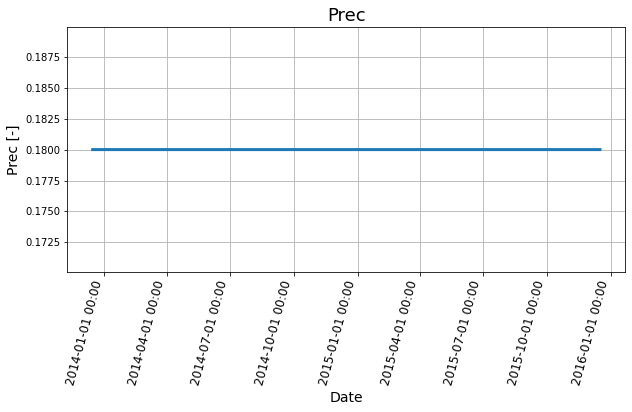

In [10]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
plt.plot(dfOut['date'],dfOut['Prec'], lineWidth =3)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Prec [-]',fontsize=14)   
plt.title('Prec',fontsize=18)
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
xlabels = ax.get_xticklabels()
ax.xaxis.get_major_ticks()
for label in xlabels:
    label.set_rotation(75)
    label.set_fontsize(12)
plt.grid()
plt.show()


# Save to a .csv file

In [11]:
os.chdir(oms_project_path+"/data/Cavone/1")
#os.listdir()

In [12]:
write_timeseries_csv(dfOut,'SoilMoisture18.csv')



***SUCCESS writing!  SoilMoisture18.csv
